## Similarity Gaussian Plume

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gaussian_plume
import gaussian_plume_sc
import gaussian_plume_mean
import conversion

%matplotlib inline

## Grid and Constants

In [2]:
rate = 0.2
H = 1.3


xGrid = np.arange(0.1, 500, 5)
yGrid = np.arange(-250, 250, 5)
zGrid = np.arange(0.1,500,1)

fcor = gaussian_plume.coriolis(47)
pointSource = gaussian_plume.pointSource(0, 0, 0, rate, H)
grid = gaussian_plume.receptorGrid(xGrid, yGrid, zGrid)

# Unstable Case

In [3]:
U = 2.5
L = -5.86
u_star = 0.3
w_star = 1.321

# blh = gaussian_plume.bl_height(u_star, L, fcor)
blh = 500
h0 = 2

sigma_y = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
sigma_z = gaussian_plume.sigma_z(blh, u_star, w_star, L, blh, fcor)

## 1.1 Vertical Dispersion

Text(0, 0.5, 'Z [m]')

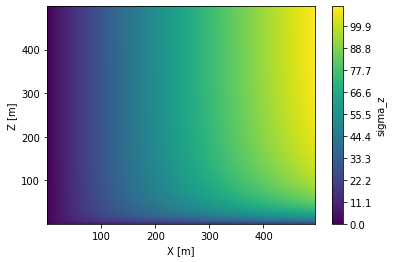

In [4]:
t = xGrid/U

sw = sigma_z.sigma_w(h0, u_star, w_star, blh)
tsz = sigma_z.timescale_z(grid.zMesh, sw, u_star, blh, fcor)
fz = sigma_z.fz(h0, t, tsz)
sz =sigma_z.sz(sw, t, fz)

fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sz[:,1,:], 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_z')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

### 1.1.a Vertical lagrangian time scale

Text(0.5, 1.0, 'Vertical Lagrangian Time Scale')

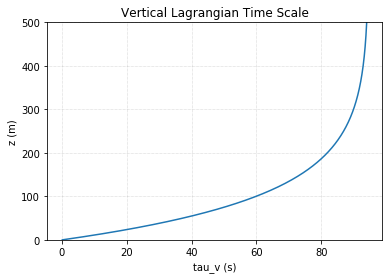

In [5]:
tsz = sigma_z.timescale_z(zGrid, sw, u_star, blh, fcor)

fig, ax = plt.subplots()
ax.plot(tsz, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_v (s)')
ax.set_ylabel('z (m)')
ax.set_title("Vertical Lagrangian Time Scale")

In [6]:
def repTSZHeight(sw, tsz, blh):
    z = -blh / 5 * np.log(1 - (tsz * sw) / (0.15 * blh))
    return z

__Discretized sigma_w__

In [7]:
zDiscrete = np.arange(0.1,500,50)

sigma_z_mean = gaussian_plume_mean.sigma_z(zDiscrete, u_star, w_star, L, blh, fcor)
swDiscrete = sigma_z_mean.sigma_w(zDiscrete, u_star, w_star, blh)
tszDiscrete = sigma_z_mean.timescale_z(zDiscrete, swDiscrete, u_star, blh, fcor)
fzDiscrete = sigma_z_mean.fz(zDiscrete, t, tszDiscrete)
szDiscrete = sigma_z_mean.sz(swDiscrete, t, fzDiscrete)

### 1.1.b Comparison of Fz

Text(0.5, 1.0, 'Fz Parameter')

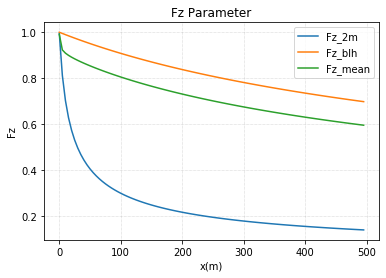

In [8]:
fz_surface = sigma_z.fz(h0, t, tsz[2])
fz_blh = sigma_z.fz(blh, t, tsz[-1])
fz_mean = np.mean(fzDiscrete, axis=0)
# fz_repH = sigma_z.fz(z_repH, t, tsz_repH)

fig, ax = plt.subplots()
ax.plot(xGrid, fz_surface, label = "Fz_2m")
ax.plot(xGrid, fz_blh, label = "Fz_blh")
ax.plot(xGrid, fz_mean, label = "Fz_mean")
# ax.plot(xGrid/U, fz_repH, label = "Fz_repZ")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('x(m)')
ax.set_ylabel('Fz')
ax.legend()
ax.set_title("Fz Parameter")

### 1.1.c Comparison of sigma_z

Text(0.5, 1.0, 'Vertical Standard Deviation')

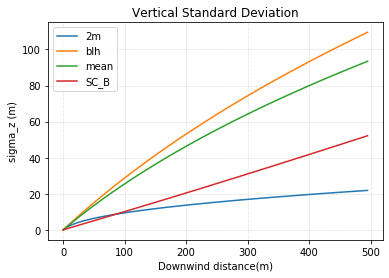

In [9]:
sz_surface = sigma_z.sz(sw, t, fz_surface)
sz_blh = sigma_z.sz(sw, t, fz_blh)


# print(sz_mean.shape)
## stability classes
stabilityB = gaussian_plume_sc.stabilityClass("B")
sz_sc_B = stabilityB.sz(xGrid)
stabilityC = gaussian_plume_sc.stabilityClass("C")
sz_sc_C = stabilityC.sz(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sz_surface, label = "2m")
ax.plot(xGrid, sz_blh, label = "blh")
ax.plot(xGrid, szDiscrete, label="mean")
ax.plot(xGrid, sz_sc_B, label="SC_B")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind distance(m)')
ax.set_ylabel('sigma_z (m)')
ax.legend()
ax.set_title("Vertical Standard Deviation")

# print(sz_blh[20])
# print(szDiscrete[20])

# print(sz_blh[60])
# print(szDiscrete[60])

## 1.2 Horizontal Dispersion

Text(0, 0.5, 'Z [m]')

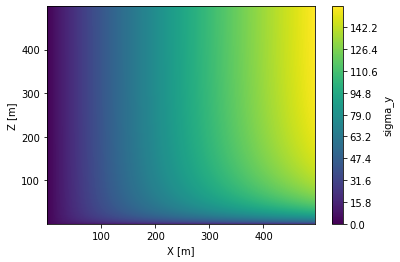

In [10]:
sv = sigma_y.sigma_v(h0, u_star, blh, fcor)
tsy = sigma_y.timescale_y(grid.zMesh, sv, u_star, blh, fcor)
fy = sigma_y.fy(t, tsy)
sy =sigma_y.sy(sv, t, fz)

fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sy[:,1,:], 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_y')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

__Discretized sigma_y__

In [11]:
sigma_y_mean = gaussian_plume_mean.sigma_y(zDiscrete, u_star, L, blh, fcor)
svDiscrete = sigma_y_mean.sigma_v(zDiscrete, u_star, blh, fcor)
tsyDiscrete = sigma_y_mean.timescale_y(zDiscrete, svDiscrete, u_star, blh, fcor)
fyDiscrete = sigma_y_mean.fy(t, tsyDiscrete)

# fy_mean = np.mean(fyDiscrete, axis=0)
# plt.plot(fy_mean)
# plt.plot(fyDiscrete, zDiscrete)
syDiscrete = sigma_y_mean.sy(svDiscrete, t, fyDiscrete)

### 1.1.a Horizontal lagrangian timescale

Text(0.5, 1.0, 'Horizontal Lagrangian Time Scale')

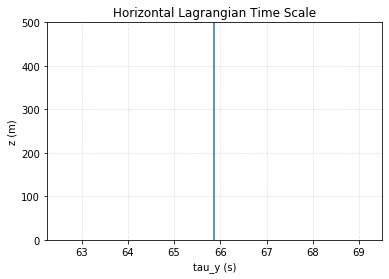

In [12]:
tsy = sigma_y.timescale_y(zGrid, sv, u_star, blh, fcor)

tsy = [tsy]* len(zGrid)

fig, ax = plt.subplots()
ax.plot(tsy, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_y (s)')
ax.set_ylabel('z (m)')
ax.set_title("Horizontal Lagrangian Time Scale")

### 1.2.b Comparison of Fy Parameter

Text(0.5, 1.0, 'Fy Parameter')

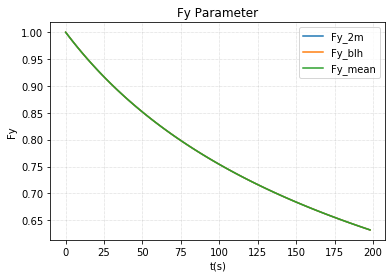

In [13]:
fy_surface = sigma_y.fy(t, tsy[2])
fy_blh = sigma_y.fy(t, tsy[-1])
fy_repH = sigma_y.fy(t, np.mean(tsy))

fig, ax = plt.subplots()
ax.plot(t, fy_surface, label = "Fy_2m")
ax.plot(t, fy_blh, label = "Fy_blh")
ax.plot(t, fy_repH, label = "Fy_mean")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('t(s)')
ax.set_ylabel('Fy')
ax.legend()
ax.set_title("Fy Parameter")

### 1.2.c Comparison of sigma_y

Text(0.5, 1.0, 'Horizontal Standard Deviation')

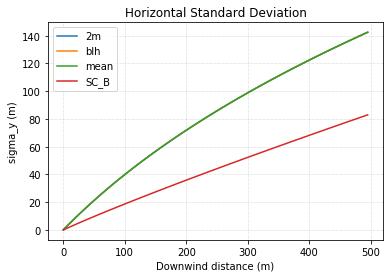

In [14]:
sy_surface = sigma_y.sy(sv, t, fy_surface)
sy_repH = sigma_y.sy(sv, t, fy_repH)
sy_blh = sigma_y.sy(sv, t, fy_blh)

## stability classes
sy_sc_B = stabilityB.sy(xGrid)
sy_sc_C = stabilityC.sy(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sy_surface, label = "2m")
ax.plot(xGrid, sy_blh, label = "blh")
ax.plot(xGrid, sy_repH, label="mean")
ax.plot(xGrid, sy_sc_B, label="SC_B")
# ax.plot(t, sy_sc_C, linestyle="--", label="SC_C")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind distance (m)')
ax.set_ylabel('sigma_y (m)')
ax.legend()
ax.set_title("Horizontal Standard Deviation")

## 1.3 Concentration Map

In [15]:
# ## sigma_y and sigma_z computed at BLH
# sigma_y_blh = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
# sigma_z_blh = gaussian_plume.sigma_z(blh, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z computed near surface
# sigma_y_surf = gaussian_plume.sigma_y(2, u_star, L, blh, fcor)
# sigma_z_surf = gaussian_plume.sigma_z(2, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z at the representative height
# sigma_y_repH = gaussian_plume.sigma_y(z_repH, u_star, L, blh, fcor)
# sigma_z_repH = gaussian_plume.sigma_z(z_repH, u_star, w_star, L, blh, fcor)

# a = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_blh, sigma_z_blh, blh, fcor, U)
# b = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_surf, sigma_z_surf, blh, fcor, U)
# c = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_repH, sigma_z_repH, blh, fcor, U)
d = gaussian_plume_sc.gaussianPlume(pointSource, grid, stabilityB, U)
# e = gaussian_plume_sc.gaussianPlume(pointSource, grid, stabilityC, U)


# conc_blh = a.calculateConcentration()
# conc_blh = conc_blh*1e6

# conc_surf = b.calculateConcentration()
# conc_surf = conc_surf*1e6

# # conc_repH = c.calculateConcentration()
# # conc_repH = conc_repH*1e6

conc_scB = d.calculateConcentration()
conc_scB = conc_scB*1e6

# ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)
# ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)
# ppm_conc_repH = conversion.micro2ppm(conc_repH, mass=16.04)
ppm_conc_scB = conversion.micro2ppm(conc_scB, mass=16.04)

In [16]:
def GaussianConcentration(y, z, sy, sz):
    a = rate / (2 * np.pi * U * sy * sz)
    b = np.exp(-(y)**2 / (2 * sy ** 2))
    c = np.exp(-(z - H)**2 / (2 * sz**2)) + np.exp(-(z + H) ** 2 / (2 * sz**2))
    
    conc = a * b * c
    
    return conc

### 1.3.a Transect and vertical profiles

__100 meter Transect__

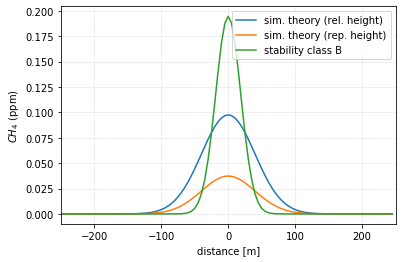

In [35]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[20], sz_surface[20])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[20], sz_blh[20])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="sim. theory (rel. height)")
# ax.plot(yGrid, ppm_conc_blh, label="sim.theory (boundary layer height)")
ax.plot(yGrid, ppm_conc_mean, label="sim. theory (rep. height)")
ax.plot(yGrid, ppm_conc_scB[2,:,20], label="stability class B")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__300 meter Transect__

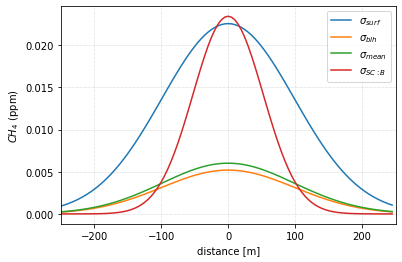

In [36]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[60], sz_surface[60])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[60], sz_blh[60])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
# ax.plot(yGrid, ppm_conc_repH[2,:,20], label="$\sigma_{repZ}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_scB[2,:,60], label="$\sigma_{SC:B}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__500m transect__

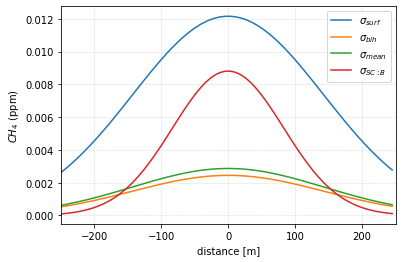

In [37]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[-1], szDiscrete[-1])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[-1], sz_surface[-1])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[-1], sz_blh[-1])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
# ax.plot(yGrid, ppm_conc_repH[2,:,20], label="$\sigma_{repZ}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_scB[2,:,-1], label="$\sigma_{SC:B}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__Vertical profile at the center of the plume 100m downwind__

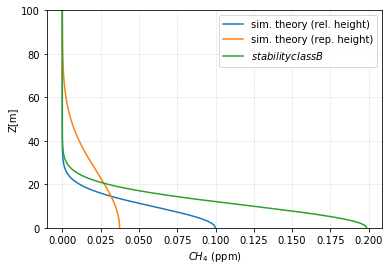

In [41]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[20], sz_surface[20])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[20], sz_blh[20])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="sim. theory (rel. height)")
# ax.plot(ppm_conc_blh, zGrid, label="sim. theory (blh)")
ax.plot(ppm_conc_mean, zGrid, label="sim. theory (rep. height)")
ax.plot(ppm_conc_scB[:,50,20], zGrid, label="$stability class B$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,100])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

__Vertical profile at the center of the plume 300m downwind__

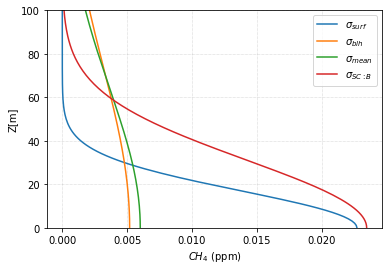

In [23]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[60], sz_surface[60])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[60], sz_blh[60])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_scB[:,50,60], zGrid, label="$\sigma_{SC:B}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,100])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

__Vertical profile at the center of the plume 500m downwind__

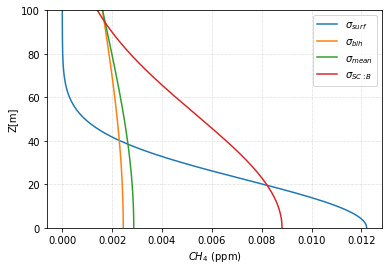

In [24]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[-1], szDiscrete[-1])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[-1], sz_surface[-1])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[-1], sz_blh[-1])
    conc_blh.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_scB[:,50,-1], zGrid, label="$\sigma_{SC:B}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,100])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

# STABLE

In [23]:
U = 3
L = 11.5
u_star = 0.3

sigma_y = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
sigma_z = gaussian_plume.sigma_z(blh, u_star, w_star, L, blh, fcor)

## Vertical dispersion

Text(0,0.5,'Z [m]')

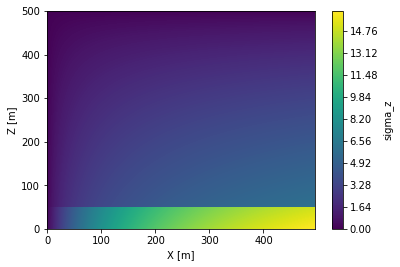

In [24]:
t = xGrid/U

sw = sigma_z.sigma_w(zGrid, u_star, w_star, blh)

fz = np.zeros((len(zGrid), len(t)), np.float)
for i, z in enumerate(zGrid):
    for j, time in enumerate(t):
        fz[i,j] = sigma_z.fz(z, time, tsz)

sz = np.zeros((len(sw), len(t)), np.float)
for i, sigma_w in enumerate(sw):
    for j, time in enumerate(t):
        sz[i,j]= sigma_z.sz(sigma_w, time, fz[i,j])
    
fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sz, 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_z')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

### 2.1.a Sigma_w up to the boundary layer height

Text(0.5,1,'$\\sigma_w$ Parameter')

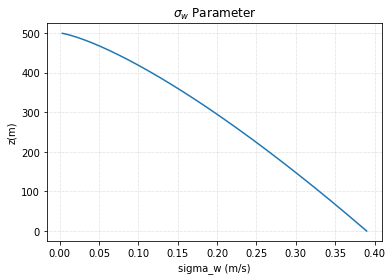

In [25]:
sw = sigma_z.sigma_w(zGrid, u_star, w_star, blh)

fig, ax = plt.subplots()
ax.plot(sw, zGrid, label = "sigma_w")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('sigma_w (m/s)')
ax.set_ylabel('z(m)')
ax.set_title("$\sigma_w$ Parameter")

__Discretized sigma_y__

In [26]:
zDiscrete = np.arange(0.1,500,25)

sigma_z_mean = gaussian_plume_mean.sigma_z(zDiscrete, u_star, w_star, L, blh, fcor)
swDiscrete = sigma_z_mean.sigma_w(zDiscrete, u_star, w_star, blh)
tszDiscrete = sigma_z_mean.timescale_z(zDiscrete, swDiscrete, u_star, blh, fcor)
fzDiscrete = sigma_z_mean.fz(zDiscrete, t, tszDiscrete)
szDiscrete = sigma_z_mean.sz(swDiscrete, t, fzDiscrete)

### 2.1.b Comparison of Fz parameter

Text(0.5,1,'Fz Parameter')

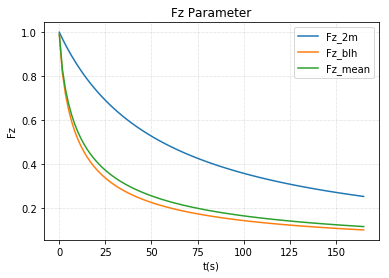

In [27]:
fz_surface = sigma_z.fz(h0, t, tsz)
fz_blh = sigma_z.fz(blh, t, tsz)
fz_mean = np.mean(fzDiscrete, axis=0)

fig, ax = plt.subplots()
ax.plot(t, fz_surface, label = "Fz_2m")
ax.plot(t, fz_blh, label = "Fz_blh")
ax.plot(t, fz_mean, label="Fz_mean")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('t(s)')
ax.set_ylabel('Fz')
ax.legend()
ax.set_title("Fz Parameter")

### 2.1c Comparison of sigma_z parameter

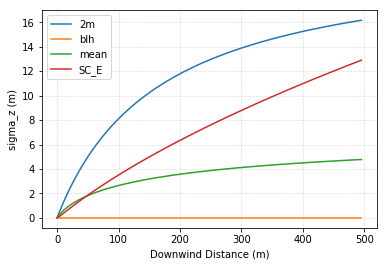

In [28]:
sw_surface = sigma_z.sigma_w(h0, u_star, w_star, blh)
sw_blh = sigma_z.sigma_w(blh, u_star, w_star, blh)

sz_surface = sigma_z.sz(sw_surface, t, fz_surface)
sz_blh = sigma_z.sz(sw_blh, t, fz_blh)

# stability classes
stability = gaussian_plume_sc.stabilityClass("E")
sz_sc = stability.sz(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sz_surface, label = "2m")
ax.plot(xGrid, sz_blh, label = "blh")
ax.plot(xGrid, szDiscrete, label = "mean")
ax.plot(xGrid, sz_sc, label="SC_E")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind Distance (m)')
ax.set_ylabel('sigma_z (m)')
ax.legend()

## Horizontal Dispersion
### 2.2.a Horizontal sigma_y parameter

Text(0,0.5,'Z [m]')

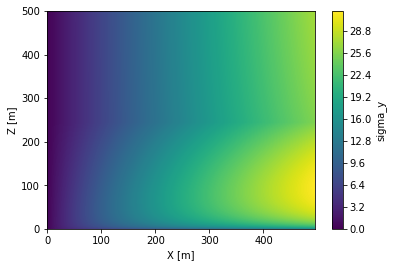

In [29]:
sv = np.array([sigma_y.sigma_v(z, u_star, blh, fcor) for z in zGrid])
tsy = sigma_y.timescale_y(zGrid, sv, u_star, blh, fcor)

fy = np.zeros((len(t), len(tsy)), np.float)
for i, time in enumerate(t):
    for j, timescale in enumerate(tsy):
              fy[i,j] = sigma_y.fy(time, timescale)
            
sy = np.zeros((len(sv), len(t)), np.float)
for i, sigma_v in enumerate(sv):
    for j, time in enumerate(t):
        sy[i,j] = sigma_y.sy(sigma_v, time, fy[j,i])

fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sy, 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_y')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

__Discretized sigma_y__

In [30]:
sigma_y_mean = gaussian_plume_mean.sigma_y(zDiscrete, u_star, L, blh, fcor)
svDiscrete = sigma_y_mean.sigma_v(zDiscrete, u_star, blh, fcor)
tsyDiscrete = sigma_y_mean.timescale_y(zDiscrete, svDiscrete, u_star, blh, fcor)
fyDiscrete = sigma_y_mean.fy(t, tsyDiscrete)
syDiscrete = sigma_y_mean.sy(svDiscrete, t, fyDiscrete)

### 2.2.b Sigma_v Parameter up to the boundary layer height

Text(0.5,1,'sigma_v')

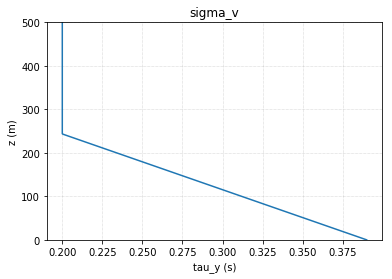

In [31]:
sv = np.array([sigma_y.sigma_v(z, u_star, blh, fcor) for z in zGrid])

fig, ax = plt.subplots()
ax.plot(sv, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_y (s)')
ax.set_ylabel('z (m)')
ax.set_title("sigma_v")

### 2.2.c Horizontal lagrangian timescale

Text(0.5,1,'Horizontal Lagrangian Time Scale')

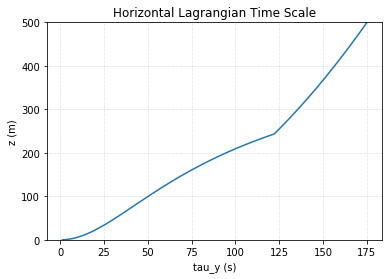

In [32]:
tsy = sigma_y.timescale_y(zGrid, sv, u_star, blh, fcor)

fig, ax = plt.subplots()
ax.plot(tsy, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_y (s)')
ax.set_ylabel('z (m)')
ax.set_title("Horizontal Lagrangian Time Scale")

### 2.2.d Comparison of Fy Parameter

Text(0.5,1,'Fy')

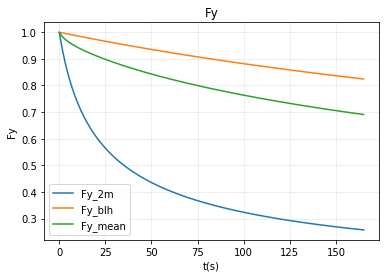

In [33]:
fy_surface = sigma_y.fy(t, tsy[2])
fy_blh = sigma_y.fy(t, tsy[-1])
fy_mean = np.mean(fyDiscrete, axis=0)

fig, ax = plt.subplots()
ax.plot(t, fy_surface, label = "Fy_2m")
ax.plot(t, fy_blh, label = "Fy_blh")
ax.plot(t, fy_mean, label = "Fy_mean")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('t(s)')
ax.set_ylabel('Fy')
ax.legend()
ax.set_title("Fy")

### 2.2.d Comparison of sigma_y parameter

Text(0.5,1,'Horizontal Standard Deviation')

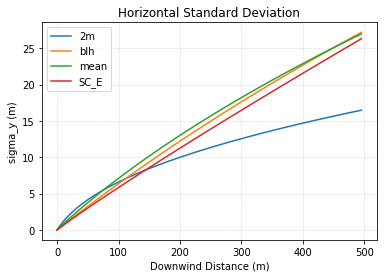

In [34]:
sv_surface = sigma_y.sigma_v(h0, u_star, blh, fcor)
sv_blh = sigma_y.sigma_v(blh, u_star, blh, fcor)

sy_surface = sigma_y.sy(sv_surface, t, fy_surface)
sy_blh = sigma_y.sy(sv_blh, t, fy_blh)

## stability classes
sy_sc = stability.sy(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sy_surface, label = "2m")
ax.plot(xGrid, sy_blh, label = "blh")
ax.plot(xGrid, syDiscrete, label = "mean")
ax.plot(xGrid, sy_sc, label="SC_E")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind Distance (m)')
ax.set_ylabel('sigma_y (m)')
ax.legend()
ax.set_title("Horizontal Standard Deviation")

## 2.3 Concentration Map

In [35]:
# ## sigma_y and sigma_z computed at BLH
# sigma_y_blh = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
# sigma_z_blh = gaussian_plume.sigma_z(blh-0.01, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z computed near surface
# sigma_y_surf = gaussian_plume.sigma_y(2, u_star, L, blh, fcor)
# sigma_z_surf = gaussian_plume.sigma_z(2, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z at the representative height
# # sigma_y_repH = gaussian_plume.sigma_y(z_repH, u_star, L, blh, fcor)
# # sigma_z_repH = gaussian_plume.sigma_z(z_repH, u_star, w_star, L, blh, fcor)

# a = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_blh, sigma_z_blh, blh, fcor, U)
# b = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_surf, sigma_z_surf, blh, fcor, U)
# c = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_repH, sigma_z_repH, blh, fcor, U)
d = gaussian_plume_sc.gaussianPlume(pointSource, grid, stability, U)

# conc_blh = a.calculateConcentration()
# conc_blh = conc_blh*1e6

# conc_surf = b.calculateConcentration()
# conc_surf = conc_surf*1e6

# conc_repH = c.calculateConcentration()
# conc_repH = conc_repH*1e6

conc_sc = d.calculateConcentration()
conc_sc = conc_sc*1e6

# ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)
# ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)
# ppm_conc_repH = conversion.micro2ppm(conc_repH, mass=16.04)
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

__100m Transect__

C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


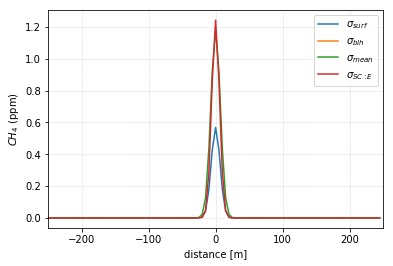

In [36]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[20], sz_surface[20])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[20], sz_blh[20])
    conc_blh.append(cT)

conc_sc = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_sc[20], sz_sc[20])
    conc_sc.append(cT)
    

conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_sc, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__300m Transect__

C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


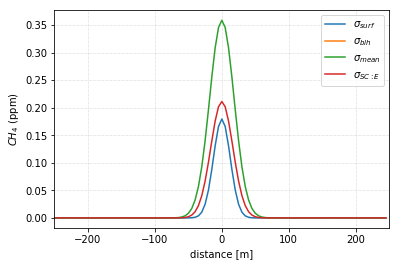

In [37]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[60], sz_surface[60])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[60], sz_blh[60])
    conc_blh.append(cT)

conc_sc = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_sc[60], sz_sc[60])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_sc, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__Vertical profile at the center of the plume 100m downwind__

C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


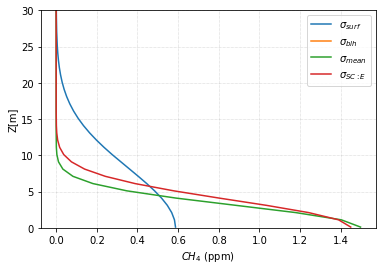

In [38]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[20], sz_surface[20])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[20], sz_blh[20])
    conc_blh.append(cT)
    
conc_sc = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_sc[20], sz_sc[20])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_sc, zGrid, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,30])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

__Vertical profile at the center of the plume 300m downwind__

C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


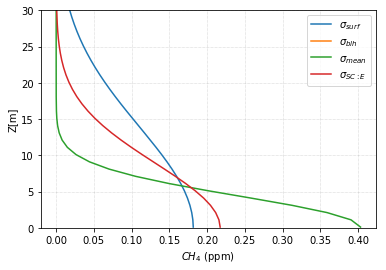

In [39]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[60], sz_surface[60])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[60], sz_blh[60])
    conc_blh.append(cT)

conc_sc = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_sc[60], sz_sc[60])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)


fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_sc, zGrid, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,30])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

# 3. NEUTRAL

In [52]:
U = 5.5
L = 0 ## z/L = 0 meaning L is very large that leading to z/L = 0 
u_star = 0.3

sigma_y = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
sigma_z = gaussian_plume.sigma_z(blh, u_star, w_star, L, blh, fcor)

Text(0, 0.5, 'Z [m]')

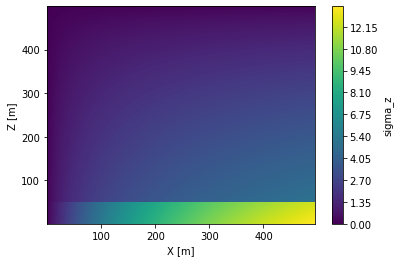

In [53]:
t = xGrid/U

sw = sigma_z.sigma_w(zGrid, u_star, w_star, blh)

fz = np.zeros((len(zGrid), len(t)), np.float)
for i, z in enumerate(zGrid):
    for j, time in enumerate(t):
        fz[i,j] = sigma_z.fz(z, time, tsz)

sz = np.zeros((len(sw), len(t)), np.float)
for i, sigma_w in enumerate(sw):
    for j, time in enumerate(t):
        sz[i,j]= sigma_z.sz(sigma_w, time, fz[i,j])
    
fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sz, 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_z')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

### 3.1.a Sigma_w up to the boundary layer height

Text(0, 0.5, 'z(m)')

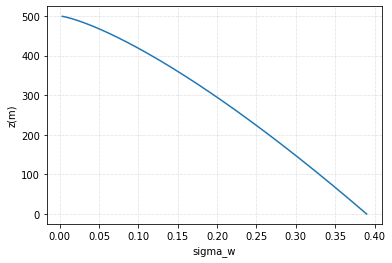

In [54]:
sw = sigma_z.sigma_w(zGrid, u_star, w_star, blh)

fig, ax = plt.subplots()
ax.plot(sw, zGrid, label = "sigma_w")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('sigma_w')
ax.set_ylabel('z(m)')

__Discretize sigma_z__

In [55]:
zDiscrete = np.arange(0.1,500,25)

sigma_z_mean = gaussian_plume_mean.sigma_z(zDiscrete, u_star, w_star, L, blh, fcor)
swDiscrete = sigma_z_mean.sigma_w(zDiscrete, u_star, w_star, blh)
tszDiscrete = sigma_z_mean.timescale_z(zDiscrete, swDiscrete, u_star, blh, fcor)
fzDiscrete = sigma_z_mean.fz(zDiscrete, t, tszDiscrete)
szDiscrete = sigma_z_mean.sz(swDiscrete, t, fzDiscrete)

### 3.1.b Comparison of Fz parameter

Text(0.5, 1.0, 'Fz')

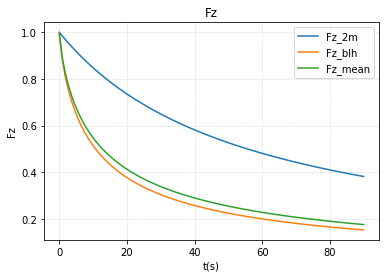

In [56]:
fz_surface = sigma_z.fz(h0, t, tsz)
fz_blh = sigma_z.fz(blh, t, tsz)
fz_mean = np.mean(fzDiscrete, axis=0)

fig, ax = plt.subplots()
ax.plot(t, fz_surface, label = "Fz_2m")
ax.plot(t, fz_blh, label = "Fz_blh")
ax.plot(t, fz_mean, label="Fz_mean")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('t(s)')
ax.set_ylabel('Fz')
ax.legend()
ax.set_title("Fz")

### 3.1c Comparison of sigma_z parameter

Text(0.5, 1.0, 'Vertical Standard Deviation')

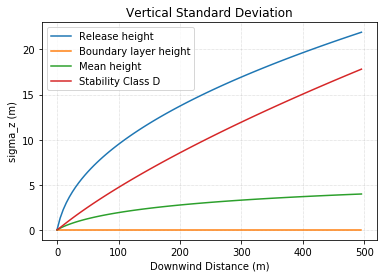

In [57]:
sw_surface = sigma_z.sigma_w(h0, u_star, w_star, blh)
sw_blh = sigma_z.sigma_w(blh, u_star, w_star, blh)

sz_blh = sigma_z.sz(sw_blh, t, fz_blh)

# stability classes
stability = gaussian_plume_sc.stabilityClass("D")
sz_sc = stability.sz(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sz_surface, label = "Release height")
ax.plot(xGrid, sz_blh, label = "Boundary layer height")
ax.plot(xGrid, szDiscrete, label= "Mean height")
ax.plot(xGrid, sz_sc, label="Stability Class D")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind Distance (m)')
ax.set_ylabel('sigma_z (m)')
ax.legend()
ax.set_title("Vertical Standard Deviation")

## Horizontal Dispersion
### 3.2.a Horizontal sigma_y parameter

Text(0, 0.5, 'Z [m]')

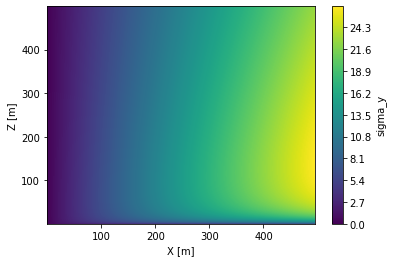

In [59]:
sv = np.array([sigma_y.sigma_v(z, u_star, blh, fcor) for z in zGrid])
tsy = sigma_y.timescale_y(zGrid, sv, u_star, blh, fcor)

fy = np.zeros((len(t), len(tsy)), np.float)
for i, time in enumerate(t):
    for j, timescale in enumerate(tsy):
              fy[i,j] = sigma_y.fy(time, timescale)
            
sy = np.zeros((len(sv), len(t)), np.float)
for i, sigma_v in enumerate(sv):
    for j, time in enumerate(t):
        sy[i,j] = sigma_y.sy(sigma_v, time, fy[j,i])

fig, ax = plt.subplots()
c = ax.contourf(xGrid, zGrid, sy, 1000)
cb = fig.colorbar(c)
cb.set_label('sigma_y')
ax.set_xlabel('X [m]')
ax.set_ylabel('Z [m]')

__Discretized sigma_y__

In [60]:
sigma_y_mean = gaussian_plume_mean.sigma_y(zDiscrete, u_star, L, blh, fcor)
svDiscrete = sigma_y_mean.sigma_v(zDiscrete, u_star, blh, fcor)
tsyDiscrete = sigma_y_mean.timescale_y(zDiscrete, svDiscrete, u_star, blh, fcor)
fyDiscrete = sigma_y_mean.fy(t, tsyDiscrete)
syDiscrete = sigma_y_mean.sy(svDiscrete, t, fyDiscrete)

### 3.2.b Sigma_v Parameter up to the boundary layer height

Text(0.5, 1.0, 'sigma_v')

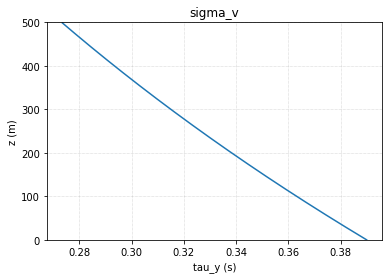

In [61]:
sv = np.array([sigma_y.sigma_v(z, u_star, blh, fcor) for z in zGrid])

fig, ax = plt.subplots()
ax.plot(sv, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_y (s)')
ax.set_ylabel('z (m)')
ax.set_title("sigma_v")

### 3.2.c Horizontal lagrangian timescale

Text(0.5, 1.0, 'Horizontal Lagrangian Time Scale')

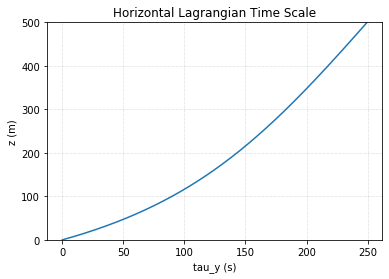

In [62]:
tsy = sigma_y.timescale_y(zGrid, sv, u_star, blh, fcor)

fig, ax = plt.subplots()
ax.plot(tsy, zGrid)
ax.plot()
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,blh])
ax.set_xlabel('tau_y (s)')
ax.set_ylabel('z (m)')
ax.set_title("Horizontal Lagrangian Time Scale")

### 3.2.d Comparison of Fy Parameter

Text(0.5, 1.0, 'Fy')

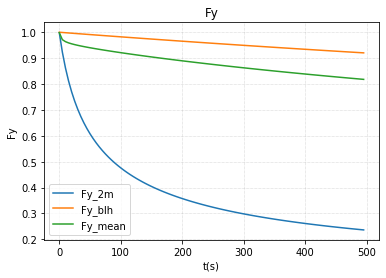

In [63]:
fy_surface = sigma_y.fy(t, tsy[2])
fy_blh = sigma_y.fy(t, tsy[-1])
fy_mean = np.mean(fyDiscrete, axis=0)

fig, ax = plt.subplots()
ax.plot(xGrid, fy_surface, label = "Fy_2m")
ax.plot(xGrid, fy_blh, label = "Fy_blh")
ax.plot(xGrid, fy_mean, label = "Fy_mean")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('t(s)')
ax.set_ylabel('Fy')
ax.legend()
ax.set_title("Fy")

### 3.2.e Comparison of sigma_y parameter

Text(0.5, 1.0, 'Horizontal Standard Deviation')

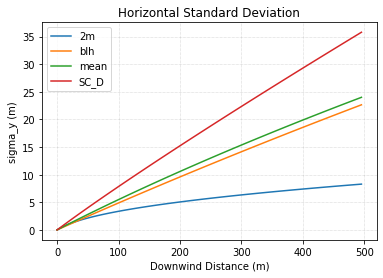

In [64]:
sv_surface = sigma_y.sigma_v(h0, u_star, blh, fcor)
sv_blh = sigma_y.sigma_v(blh, u_star, blh, fcor)

sy_surface = sigma_y.sy(sv_surface, t, fy_surface)
sy_blh = sigma_y.sy(sv_blh, t, fy_blh)

## stability classes
sy_sc = stability.sy(xGrid)

fig, ax = plt.subplots()
ax.plot(xGrid, sy_surface, label = "2m")
ax.plot(xGrid, sy_blh, label = "blh")
ax.plot(xGrid, syDiscrete, label= "mean")
ax.plot(xGrid, sy_sc, label="SC_D")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind Distance (m)')
ax.set_ylabel('sigma_y (m)')
ax.legend()
ax.set_title("Horizontal Standard Deviation")

## 3.3 Concentration Map

In [65]:
# ## sigma_y and sigma_z computed at BLH
# sigma_y_blh = gaussian_plume.sigma_y(blh, u_star, L, blh, fcor)
# sigma_z_blh = gaussian_plume.sigma_z(blh-0.01, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z computed near surface
# sigma_y_surf = gaussian_plume.sigma_y(2, u_star, L, blh, fcor)
# sigma_z_surf = gaussian_plume.sigma_z(2, u_star, w_star, L, blh, fcor)

# ## sigma_y and sigma_z computed at representative height
# sigma_y_repH = gaussian_plume.sigma_y(z_repH, u_star, L, blh, fcor)
# sigma_z_repH = gaussian_plume.sigma_z(z_repH, u_star, w_star, L, blh, fcor)

# a = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_blh, sigma_z_blh, blh, fcor, U)
# b = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_surf, sigma_z_surf, blh, fcor, U)
# c = gaussian_plume.gaussianPlume(pointSource, grid, sigma_y_repH, sigma_z_repH, blh, fcor, U)
d = gaussian_plume_sc.gaussianPlume(pointSource, grid, stability, U)

# conc_blh = a.calculateConcentration()
# conc_blh = conc_blh*1e6

# conc_surf = b.calculateConcentration()
# conc_surf = conc_surf*1e6

# conc_repH = c.calculateConcentration()
# conc_repH = conc_repH*1e6

conc_sc = d.calculateConcentration()
conc_sc = conc_sc*1e6

# ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)
# ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)
# ppm_conc_repH = conversion.micro2ppm(conc_repH, mass=16.04)
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

In [53]:
# fig, ax = plt.subplots()
# c = ax.contourf(xGrid, yGrid, ppm_conc_blh[2,:,:], 1000)
# cb = fig.colorbar(c)
# cb.set_label('Concentration [ppm]')
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Y [m]')

# fig, ax = plt.subplots()
# c = ax.contourf(xGrid, yGrid, ppm_conc_surf[2,:,:], 1000)
# cb = fig.colorbar(c)
# cb.set_label('Concentration [ppm]')
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Y [m]')

# fig, ax = plt.subplots()
# c = ax.contourf(xGrid, yGrid, ppm_conc_sc[2,:,:], 1000)
# cb = fig.colorbar(c)
# cb.set_label('Concentration [ppm]')
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Y [m]')

__100m transect__

C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


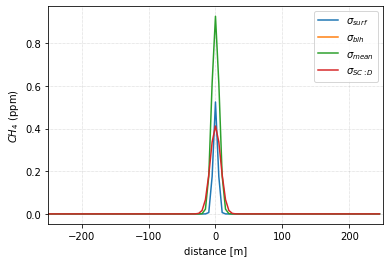

In [66]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[20], sz_surface[20])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[20], sz_blh[20])
    conc_blh.append(cT)
    
conc_sc = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_sc[20], sz_sc[20])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_sc, label="$\sigma_{SC:D}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__300m transect__

C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


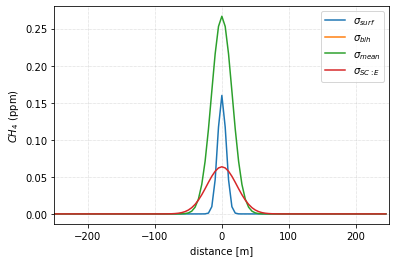

In [73]:
conc_mean = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)

conc_surf = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_surface[60], sz_surface[60])
    conc_surf.append(cT)
    
conc_blh = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_blh[60], sz_blh[60])
    conc_blh.append(cT)
    
conc_sc = []
for y in yGrid:
    cT = GaussianConcentration(y, zGrid[2], sy_sc[60], sz_sc[60])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(yGrid, ppm_conc_surf, label="$\sigma_{surf}$")
ax.plot(yGrid, ppm_conc_blh, label="$\sigma_{blh}$")
ax.plot(yGrid, ppm_conc_mean, label="$\sigma_{mean}$")
ax.plot(yGrid, ppm_conc_sc, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlim([-250, 250])
ax.set_xlabel("distance [m]")
ax.set_ylabel("$CH_4$ (ppm)")
ax.legend()

__Vertical profile at the center of the plume 100m downwind__

C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


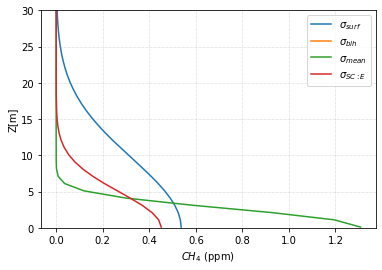

In [68]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[20], szDiscrete[20])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[20], sz_surface[20])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[20], sz_blh[20])
    conc_blh.append(cT)

conc_sc = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_sc[20], sz_sc[20])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_sc = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_sc, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_sc, zGrid, label="$\sigma_{SC:E}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,30])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()

__Vertical profile at the center of the plume 300m downwind__

C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mrp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


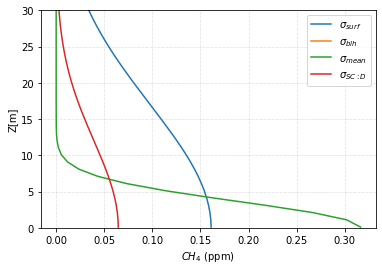

In [69]:
conc_mean = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, syDiscrete[60], szDiscrete[60])
    conc_mean.append(cT)
    
conc_surf = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_surface[60], sz_surface[60])
    conc_surf.append(cT)

conc_blh = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_blh[60], sz_blh[60])
    conc_blh.append(cT)
    
conc_sc = []
for z in zGrid:
    cT = GaussianConcentration(yGrid[50], z, sy_sc[60], sz_sc[60])
    conc_sc.append(cT)
    
conc_mean = np.array(conc_mean)*1e6
ppm_conc_mean = conversion.micro2ppm(conc_mean, mass=16.04)

conc_surf = np.array(conc_surf)*1e6
ppm_conc_surf = conversion.micro2ppm(conc_surf, mass=16.04)

conc_blh = np.array(conc_blh)*1e6
ppm_conc_blh = conversion.micro2ppm(conc_blh, mass=16.04)

conc_blh = np.array(conc_sc)*1e6
ppm_conc_sc = conversion.micro2ppm(conc_blh, mass=16.04)

fig, ax = plt.subplots()
ax.plot(ppm_conc_surf, zGrid, label="$\sigma_{surf}$")
ax.plot(ppm_conc_blh, zGrid, label="$\sigma_{blh}$")
ax.plot(ppm_conc_mean, zGrid, label="$\sigma_{mean}$")
ax.plot(ppm_conc_sc, zGrid, label="$\sigma_{SC:D}$")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_ylim([0,30])
ax.set_xlabel("$CH_4$ (ppm)")
ax.set_ylabel("Z[m]")
ax.legend()